In [183]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from metpy.calc import wind_components
from metpy.units import units
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from metpy.plots import Hodograph, SkewT

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [3]:
#Bring in new classified arc dataset
Tstorm1 = np.genfromtxt('NewArcData/ML_testKAMA20151116220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm1 = Tstorm1[1::2, :]

Tstorm2 = np.genfromtxt('NewArcData/ML_testKDGX2017272011.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm2 = Tstorm2[1::2, :]

Tstorm3 = np.genfromtxt('NewArcData/ML_testKFDR20175181730.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm3 = Tstorm3[1::2, :]

Tstorm4 = np.genfromtxt('NewArcData/ML_testKFSD2014618230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm4 = Tstorm4[1::2, :]

Tstorm5 = np.genfromtxt('NewArcData/ML_testKIND20157132330.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm5 = Tstorm5[1::2, :]

Tstorm6 = np.genfromtxt('NewArcData/ML_testKMVX2017711220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm6 = Tstorm6[1::2, :]

Tstorm7 = np.genfromtxt('NewArcData/ML_testKOAX20186112130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm7 = Tstorm7[1::2, :]

Tstorm8 = np.genfromtxt('NewArcData/ML_testKPOE201742170.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm8 = Tstorm8[1::2, :]

Tstorm9 = np.genfromtxt('NewArcData/ML_testKINX2016330230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm9 = Tstorm9[1::2, :]

Tstorm10 = np.genfromtxt('NewArcData/ML_testKOAX2016592030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm10 = Tstorm10[1::2, :]

#All storms after this point are nontornadic

Tstorm11 = np.genfromtxt('NewArcData/ML_testKDDC2018512130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm11 = Tstorm11[1::2, :]

Tstorm12 = np.genfromtxt('NewArcData/ML_testKLNX201872220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm12 = Tstorm12[1::2, :]

Tstorm13 = np.genfromtxt('NewArcData/ML_testKUDX20167181930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm13 = Tstorm13[1::2, :]

Tstorm14 = np.genfromtxt('NewArcData/ML_testKAMA2015527200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm14 = Tstorm14[1::2, :]

Tstorm15 = np.genfromtxt('NewArcData/ML_testKSJT20185141930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm15 = Tstorm15[1::2, :]

Tstorm16 = np.genfromtxt('NewArcData/ML_testKUEX2016524030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm16 = Tstorm16[1::2, :]

Tstorm17 = np.genfromtxt('NewArcData/ML_testKLBB20164102030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm17 = Tstorm17[1::2, :]

Tstorm18 = np.genfromtxt('NewArcData/ML_testKTLX2019323220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm18 = Tstorm18[1::2, :]

Tstorm19 = np.genfromtxt('NewArcData/ML_testKUEX2018511930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm19 = Tstorm19[1::2, :]

Tstorm20 = np.genfromtxt('NewArcData/ML_testKFDR2016411030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
Tstorm20 = Tstorm20[1::2, :]

In [12]:
#Bring in zdr arc data
stormA = np.genfromtxt('ML_testKBIS201383100.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormA = stormA[1::2, :]

stormB = np.genfromtxt('ML_testKFDR2013417220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormB = stormB[1::2, :]

stormBB = np.genfromtxt('ML_testKINX20135202024.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormBB = stormBB[1::2, :]

stormC = np.genfromtxt('ML_testKDGX201312202240.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormC = stormC[1::2, :]

stormCC = np.genfromtxt('ML_testKLBB20136192210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormCC = stormCC[1::2, :]

stormD = np.genfromtxt('ML_testKFFC201233115.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormD = stormD[1::2, :]

stormDD = np.genfromtxt('ML_testKLOT201311171750.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormDD = stormDD[1::2, :]

stormEE = np.genfromtxt('ML_testKMQT20126900.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormEE = stormEE[1::2, :]

stormF = np.genfromtxt('ML_testKHTX201232150.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormF = stormF[1::2, :]

stormFF = np.genfromtxt('ML_testKOHX20124262330.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormFF = stormFF[1::2, :]

#stormG = np.genfromtxt('Machine_Learning/ML_wedgesKFDR2013417220_F.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13))
#stormG = stormA[1::2, :]

stormH = np.genfromtxt('ML_testKEAX2013520210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormH = stormH[1::2, :]

stormHH = np.genfromtxt('ML_testKSRX2013331320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormHH = stormHH[1::2, :]

stormI = np.genfromtxt('ML_testKFFC20133182125.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormI = stormI[1::2, :]

stormII = np.genfromtxt('ML_testKTLX2013531230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormII = stormII[1::2, :]

stormJ = np.genfromtxt('ML_testKDDC2012430220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormJ = stormJ[1::2, :]

stormK = np.genfromtxt('ML_testKEWX2012510180.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormK = stormK[1::2, :]

stormL = np.genfromtxt('ML_testKHPX20131117210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormL = stormL[1::2, :]

stormM = np.genfromtxt('ML_testKSHV20132182243.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormM = stormM[1::2, :]

stormO = np.genfromtxt('ML_testKTWX2012415014.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormO = stormO[1::2, :]

stormR = np.genfromtxt('ML_testKFWS2013515230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormR = stormR[1::2, :]

stormS = np.genfromtxt('ML_testKIND20131117200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormS = stormS[1::2, :]

stormW = np.genfromtxt('ML_testKAMA20138142326.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormW = stormW[1::2, :]

stormX = np.genfromtxt('ML_testKJAX20135509.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormX = stormX[1::2, :]

stormY = np.genfromtxt('ML_testKVWX201311171915.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormY = stormY[1::2, :]

stormZ = np.genfromtxt('ML_testKINX2013531011.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
stormZ = stormZ[1::2, :]

#Add the nontornadic storms
storm7 = np.genfromtxt('NT_ML_testKAMA2012430425.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm7 = storm7[1::2, :]

storm13 = np.genfromtxt('NT_ML_testKDDC201310141938.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm13 = storm13[1::2, :]

storm14 = np.genfromtxt('NT_ML_testKDGX2013318200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm14 = storm14[1::2, :]

storm16 = np.genfromtxt('NT_ML_testKDTX20136171930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm16 = storm16[1::2, :]

storm19 = np.genfromtxt('NT_ML_testKFWS2013102700.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm19 = storm19[1::2, :]

storm23 = np.genfromtxt('NT_ML_testKLOT2014521130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm23 = storm23[1::2, :]

storm24 = np.genfromtxt('NT_ML_testKMPX201386230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm24 = storm24[1::2, :]

storm26 = np.genfromtxt('NT_ML_testKSGF2013472310.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm26 = storm26[1::2, :]

storm27 = np.genfromtxt('NT_ML_testKABR2013792320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm27 = storm27[1::2, :]

storm28 = np.genfromtxt('NT_ML_testKDMX2013521130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm28 = storm28[1::2, :]

storm29 = np.genfromtxt('NT_ML_testKUDX2013525210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm29 = storm29[1::2, :]

storm30 = np.genfromtxt('NT_ML_testKUDX2013723200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm30 = storm30[1::2, :]

storm32 = np.genfromtxt('NT_ML_testKFTG2014520210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm32 = storm32[1::2, :]

storm1 = np.genfromtxt('NT_ML_testKTLX201342710.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm1 = storm1[1::2, :]

storm3 = np.genfromtxt('NT_ML_testKTLX2013530189.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm3 = storm3[1::2, :]

storm5 = np.genfromtxt('NT_ML_testKVNX20134222320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm5 = storm5[1::2, :]

storm10 = np.genfromtxt('NT_ML_testKBIS201494520.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm10 = storm10[1::2, :]

storm21 = np.genfromtxt('NT_ML_testKICT20144320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm21 = storm21[1::2, :]

storm2 = np.genfromtxt('NT2_ML_testKTLX201342710.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm2 = storm2[1::2, :]

storm4 = np.genfromtxt('NT2_ML_testKTLX2013530189.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm4 = storm4[1::2, :]

storm6 = np.genfromtxt('NT2_ML_testKVNX20134222320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14))
storm6 = storm6[1::2, :]


In [13]:
#With whole tornadic dataset and nontornadic cells listed above
areas = np.concatenate((stormA[:,0], stormB[:,0], stormBB[:,0], stormC[:,0], stormCC[:,0], stormD[:,0], stormDD[:,0], stormEE[:,0], stormF[:,0], stormFF[:,0], stormH[:,0], stormHH[:,0], stormI[:,0], stormII[:,0], stormJ[:,0], stormK[:,0], stormL[:,0], stormM[:,0], stormO[:,0], stormR[:,0], stormS[:,0], stormW[:,0], stormX[:,0], stormY[:,0], stormZ[:,0], storm7[:,0], storm13[:,0], storm14[:,0], storm16[:,0], storm19[:,0], storm23[:,0], storm24[:,0], storm26[:,0], storm27[:,0], storm28[:,0], storm29[:,0], storm30[:,0], storm32[:,0], storm1[:,0], storm3[:,0], storm5[:,0], storm10[:,0], storm21[:,0], storm2[:,0], storm4[:,0], storm6[:,0]))
distances = np.concatenate((stormA[:,1], stormB[:,1], stormBB[:,1], stormC[:,1], stormCC[:,1], stormD[:,1], stormDD[:,1], stormEE[:,1], stormF[:,1], stormFF[:,1], stormH[:,1], stormHH[:,1], stormI[:,1], stormII[:,1], stormJ[:,1], stormK[:,1], stormL[:,1], stormM[:,1], stormO[:,1], stormR[:,1], stormS[:,1], stormW[:,1], stormX[:,1], stormY[:,1], stormZ[:,1], storm7[:,1], storm13[:,1], storm14[:,1], storm16[:,1], storm19[:,1], storm23[:,1], storm24[:,1], storm26[:,1], storm27[:,1], storm28[:,1], storm29[:,1], storm30[:,1], storm32[:,1], storm1[:,1], storm3[:,1], storm5[:,1], storm10[:,1], storm21[:,1], storm2[:,1], storm4[:,1], storm6[:,1]))
angles = np.concatenate((stormA[:,2], stormB[:,2], stormBB[:,2], stormC[:,2], stormCC[:,2], stormD[:,2], stormDD[:,2], stormEE[:,2], stormF[:,2], stormFF[:,2], stormH[:,2], stormHH[:,2], stormI[:,2], stormII[:,2], stormJ[:,2], stormK[:,2], stormL[:,2], stormM[:,2], stormO[:,2], stormR[:,2], stormS[:,2], stormW[:,2], stormX[:,2], stormY[:,2], stormZ[:,2], storm7[:,2], storm13[:,2], storm14[:,2], storm16[:,2], storm19[:,2], storm23[:,2], storm24[:,2], storm26[:,2], storm27[:,2], storm28[:,2], storm29[:,2], storm30[:,2], storm32[:,2], storm1[:,2], storm3[:,2], storm5[:,2], storm10[:,2], storm21[:,2], storm2[:,2], storm4[:,2], storm6[:,2]))
means = np.concatenate((stormA[:,3], stormB[:,3], stormBB[:,3], stormC[:,3], stormCC[:,3], stormD[:,3], stormDD[:,3], stormEE[:,3], stormF[:,3], stormFF[:,3], stormH[:,3], stormHH[:,3], stormI[:,3], stormII[:,3], stormJ[:,3], stormK[:,3], stormL[:,3], stormM[:,3], stormO[:,3], stormR[:,3], stormS[:,3], stormW[:,3], stormX[:,3], stormY[:,3], stormZ[:,3], storm7[:,3], storm13[:,3], storm14[:,3], storm16[:,3], storm19[:,3], storm23[:,3], storm24[:,3], storm26[:,3], storm27[:,3], storm28[:,3], storm29[:,3], storm30[:,3], storm32[:,3], storm1[:,3], storm3[:,3], storm5[:,3], storm10[:,3], storm21[:,3], storm2[:,3], storm4[:,3], storm6[:,3]))
maxes = np.concatenate((stormA[:,4], stormB[:,4], stormBB[:,4], stormC[:,4], stormCC[:,4], stormD[:,4], stormDD[:,4], stormEE[:,4], stormF[:,4], stormFF[:,4], stormH[:,4], stormHH[:,4], stormI[:,4], stormII[:,4], stormJ[:,4], stormK[:,4], stormL[:,4], stormM[:,4], stormO[:,4], stormR[:,4], stormS[:,4], stormW[:,4], stormX[:,4], stormY[:,4], stormZ[:,4], storm7[:,4], storm13[:,4], storm14[:,4], storm16[:,4], storm19[:,4], storm23[:,4], storm24[:,4], storm26[:,4], storm27[:,4], storm28[:,4], storm29[:,4], storm30[:,4], storm32[:,4], storm1[:,4], storm3[:,4], storm5[:,4], storm10[:,4], storm21[:,4], storm2[:,4], storm4[:,4], storm6[:,4]))
mean_ccs = np.concatenate((stormA[:,5], stormB[:,5], stormBB[:,5], stormC[:,5], stormCC[:,5], stormD[:,5], stormDD[:,5], stormEE[:,5], stormF[:,5], stormFF[:,5], stormH[:,5], stormHH[:,5], stormI[:,5], stormII[:,5], stormJ[:,5], stormK[:,5], stormL[:,5], stormM[:,5], stormO[:,5], stormR[:,5], stormS[:,5], stormW[:,5], stormX[:,5], stormY[:,5], stormZ[:,5], storm7[:,5], storm13[:,5], storm14[:,5], storm16[:,5], storm19[:,5], storm23[:,5], storm24[:,5], storm26[:,5], storm27[:,5], storm28[:,5], storm29[:,5], storm30[:,5], storm32[:,5], storm1[:,5], storm3[:,5], storm5[:,5], storm10[:,5], storm21[:,5], storm2[:,5], storm4[:,5], storm6[:,5]))
mean_kdps = np.concatenate((stormA[:,6], stormB[:,6], stormBB[:,6], stormC[:,6], stormCC[:,6], stormD[:,6], stormDD[:,6], stormEE[:,6], stormF[:,6], stormFF[:,6], stormH[:,6], stormHH[:,6], stormI[:,6], stormII[:,6], stormJ[:,6], stormK[:,6], stormL[:,6], stormM[:,6], stormO[:,6], stormR[:,6], stormS[:,6], stormW[:,6], stormX[:,6], stormY[:,6], stormZ[:,6], storm7[:,6], storm13[:,6], storm14[:,6], storm16[:,6], storm19[:,6], storm23[:,6], storm24[:,6], storm26[:,6], storm27[:,6], storm28[:,6], storm29[:,6], storm30[:,6], storm32[:,6], storm1[:,6], storm3[:,6], storm5[:,6], storm10[:,6], storm21[:,6], storm2[:,6], storm4[:,6], storm6[:,6]))
mean_zs = np.concatenate((stormA[:,7], stormB[:,7], stormBB[:,7], stormC[:,7], stormCC[:,7], stormD[:,7], stormDD[:,7], stormEE[:,7], stormF[:,7], stormFF[:,7], stormH[:,7], stormHH[:,7], stormI[:,7], stormII[:,7], stormJ[:,7], stormK[:,7], stormL[:,7], stormM[:,7], stormO[:,7], stormR[:,7], stormS[:,7], stormW[:,7], stormX[:,7], stormY[:,7], stormZ[:,7], storm7[:,7], storm13[:,7], storm14[:,7], storm16[:,7], storm19[:,7], storm23[:,7], storm24[:,7], storm26[:,7], storm27[:,7], storm28[:,7], storm29[:,7], storm30[:,7], storm32[:,7], storm1[:,7], storm3[:,7], storm5[:,7], storm10[:,7], storm21[:,7], storm2[:,7], storm4[:,7], storm6[:,7]))
mean_graddirs = np.concatenate((stormA[:,8], stormB[:,8], stormBB[:,8], stormC[:,8], stormCC[:,8], stormD[:,8], stormDD[:,8], stormEE[:,8], stormF[:,8], stormFF[:,8], stormH[:,8], stormHH[:,8], stormI[:,8], stormII[:,8], stormJ[:,8], stormK[:,8], stormL[:,8], stormM[:,8], stormO[:,8], stormR[:,8], stormS[:,8], stormW[:,8], stormX[:,8], stormY[:,8], stormZ[:,8], storm7[:,8], storm13[:,8], storm14[:,8], storm16[:,8], storm19[:,8], storm23[:,8], storm24[:,8], storm26[:,8], storm27[:,8], storm28[:,8], storm29[:,8], storm30[:,8], storm32[:,8], storm1[:,8], storm3[:,8], storm5[:,8], storm10[:,8], storm21[:,8], storm2[:,8], storm4[:,8], storm6[:,8]))
mean_grads = np.concatenate((stormA[:,9], stormB[:,9], stormBB[:,9], stormC[:,9], stormCC[:,9], stormD[:,9], stormDD[:,9], stormEE[:,9], stormF[:,9], stormFF[:,9], stormH[:,9], stormHH[:,9], stormI[:,9], stormII[:,9], stormJ[:,9], stormK[:,9], stormL[:,9], stormM[:,9], stormO[:,9], stormR[:,9], stormS[:,9], stormW[:,9], stormX[:,9], stormY[:,9], stormZ[:,9], storm7[:,9], storm13[:,9], storm14[:,9], storm16[:,9], storm19[:,9], storm23[:,9], storm24[:,9], storm26[:,9], storm27[:,9], storm28[:,9], storm29[:,9], storm30[:,9], storm32[:,9], storm1[:,9], storm3[:,9], storm5[:,9], storm10[:,9], storm21[:,9], storm2[:,9], storm4[:,9], storm6[:,9]))
raw_angles = np.concatenate((stormA[:,10], stormB[:,10], stormBB[:,10], stormC[:,10], stormCC[:,10], stormD[:,10], stormDD[:,10], stormEE[:,10], stormF[:,10], stormFF[:,10], stormH[:,10], stormHH[:,10], stormI[:,10], stormII[:,10], stormJ[:,10], stormK[:,10], stormL[:,10], stormM[:,10], stormO[:,10], stormR[:,10], stormS[:,10], stormW[:,10], stormX[:,10], stormY[:,10], stormZ[:,10], storm7[:,10], storm13[:,10], storm14[:,10], storm16[:,10], storm19[:,10], storm23[:,10], storm24[:,10], storm26[:,10], storm27[:,10], storm28[:,10], storm29[:,10], storm30[:,10], storm32[:,10], storm1[:,10], storm3[:,10], storm5[:,10], storm10[:,10], storm21[:,10], storm2[:,10], storm4[:,10], storm6[:,10]))
arcs = np.concatenate((stormA[:,11], stormB[:,11], stormBB[:,11], stormC[:,11], stormCC[:,11], stormD[:,11], stormDD[:,11], stormEE[:,11], stormF[:,11], stormFF[:,11], stormH[:,11], stormHH[:,11], stormI[:,11], stormII[:,11], stormJ[:,11], stormK[:,11], stormL[:,11], stormM[:,11], stormO[:,11], stormR[:,11], stormS[:,11], stormW[:,11], stormX[:,11], stormY[:,11], stormZ[:,11], storm7[:,11], storm13[:,11], storm14[:,11], storm16[:,11], storm19[:,11], storm23[:,11], storm24[:,11], storm26[:,11], storm27[:,11], storm28[:,11], storm29[:,11], storm30[:,11], storm32[:,11], storm1[:,11], storm3[:,11], storm5[:,11], storm10[:,11], storm21[:,11], storm2[:,11], storm4[:,11], storm6[:,11]))


In [14]:
directions_raw = raw_angles
directions_raw[directions_raw > 0] = 360 - directions_raw[directions_raw > 0]
directions_raw[directions_raw < 0] = (-1) * directions_raw[directions_raw < 0]
xc, yc = wind_components(distances * units('m/s'), directions_raw * units('degree'))

In [15]:
ARC_X = np.zeros((len(areas), 12))
ARC_Y = arcs

In [16]:
#Set values for ARC_X
#This time not using the threshold-dependent values
ARC_X[:,0] = areas
ARC_X[:,1] = distances
ARC_X[:,2] = maxes / means
ARC_X[:,3] = (maxes/means) * areas
ARC_X[:,4] = mean_ccs
ARC_X[:,5] = mean_kdps
ARC_X[:,6] = mean_zs
ARC_X[:,7] = mean_graddirs
ARC_X[:,8] = mean_grads
ARC_X[:,9] = raw_angles
ARC_X[:,10] = xc
ARC_X[:,11] = yc

In [17]:
# ARC_X = np.zeros((len(areas), 10))
# ARC_Y = arcs

In [18]:
# #Set values for ARC_X
# #This time not using the threshold-dependent values
# ARC_X[:,0] = areas
# ARC_X[:,1] = distances
# #ARC_X[:,2] = maxes / means
# #ARC_X[:,3] = (maxes/means) * areas
# ARC_X[:,2] = mean_ccs
# ARC_X[:,3] = mean_kdps
# ARC_X[:,4] = mean_zs
# ARC_X[:,5] = mean_graddirs
# ARC_X[:,6] = mean_grads
# ARC_X[:,7] = raw_angles
# ARC_X[:,8] = xc
# ARC_X[:,9] = yc

In [19]:
forest1 = RandomForestClassifier(n_estimators=1000, random_state=123, oob_score=True)
trainX_ARC, testX_ARC, trainY_ARC, testY_ARC = train_test_split(ARC_X, ARC_Y, test_size = 0.3, random_state=123)
forest1.fit(trainX_ARC, trainY_ARC)
print('Accuracy: \n', forest1.score(testX_ARC, testY_ARC))
pred = forest1.predict(testX_ARC)
pred_whole_dataset = forest1.predict(ARC_X)

Accuracy: 
 0.8821292775665399


In [20]:
#Try the k-fold testing
kf = KFold(n_splits=10, random_state=123, shuffle=True)
kf.get_n_splits(ARC_X, ARC_Y)

10

In [21]:
print(kf)

KFold(n_splits=10, random_state=123, shuffle=True)


In [22]:
accuracies = []

for train_index, test_index in kf.split(ARC_X, ARC_Y):
    #print(train_index.shape)
    #print(test_index.shape)
    trainX_ARC = ARC_X[train_index]
    testX_ARC = ARC_X[test_index]
    trainY_ARC = ARC_Y[train_index]
    testY_ARC = ARC_Y[test_index]

    print(trainX_ARC.shape)
    forest1.fit(trainX_ARC, trainY_ARC)
    print(forest1.oob_score.real)
    print('Accuracy: \n', forest1.score(testX_ARC, testY_ARC))
    accuracies.append(forest1.score(testX_ARC, testY_ARC))

(1576, 12)
1
Accuracy: 
 0.8863636363636364
(1576, 12)
1
Accuracy: 
 0.875
(1577, 12)
1
Accuracy: 
 0.8857142857142857
(1577, 12)
1
Accuracy: 
 0.9142857142857143
(1577, 12)
1
Accuracy: 
 0.9485714285714286
(1577, 12)
1
Accuracy: 
 0.92
(1577, 12)
1
Accuracy: 
 0.8971428571428571
(1577, 12)
1
Accuracy: 
 0.9085714285714286
(1577, 12)
1
Accuracy: 
 0.8971428571428571
(1577, 12)
1
Accuracy: 
 0.8914285714285715


In [23]:
print(np.mean(accuracies))

0.9024220779220778


In [24]:
pred = forest1.predict(testX_ARC)
pred_whole_dataset = forest1.predict(ARC_X)

In [25]:
import pickle
#Save off the best-performing forest as a pickle file!
# filename = 'RevisedRandomForest.pkl'
# pickle.dump(forest1, open(filename, 'wb'))

In [ ]:
forest_loaded = pickle.load(open('RevisedRandomForest.pkl', 'rb'))

In [ ]:
print(forest_loaded.feature_importances_)

In [ ]:
forest2 = RandomForestClassifier(n_estimators=1000, random_state=123)
forest2.fit(ARC_X, ARC_Y)

In [ ]:
accuracies_final = []
for i in range(1000):
    trainX_ARC1, testX_ARC1, trainY_ARC1, testY_ARC1 = train_test_split(testX_ARC, testY_ARC, test_size = 0.25, random_state=i)
    print('Accuracy: \n', forest1.score(testX_ARC1, testY_ARC1))
    accuracies_final.append(forest1.score(testX_ARC1, testY_ARC1))

In [ ]:
print(np.mean(accuracies_final))

In [ ]:
plt.figure(1, figsize=(12,12))
plt.hist(accuracies_final)

In [ ]:
forest3 = RandomForestClassifier(random_state=123)

In [ ]:
model_params = {
    'n_estimators': [50, 100, 250, 500, 1000],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [ ]:
clf3 = GridSearchCV(forest3, model_params, cv=10)

In [ ]:
model3 = clf3.fit(ARC_X, ARC_Y)

In [ ]:
# print winning set of hyperparameters
from pprint import pprint
pprint(model3.best_estimator_.get_params())

In [ ]:
print(model3.best_estimator_.score(ARC_X, ARC_Y))

In [ ]:
#Create a forest based on the best estimator from above
forest4 = RandomForestClassifier(random_state=123, n_estimators=500, max_features=0.5, min_samples_split=4)

In [ ]:
accuracies_o = []

for train_index, test_index in kf.split(ARC_X, ARC_Y):
    #print(train_index.shape)
    #print(test_index.shape)
    trainX_ARC = ARC_X[train_index]
    testX_ARC = ARC_X[test_index]
    trainY_ARC = ARC_Y[train_index]
    testY_ARC = ARC_Y[test_index]

    print(trainX_ARC.shape)
    model3.best_estimator_.fit(trainX_ARC, trainY_ARC)
    #print(forest1.oob_score.real)
    print('Accuracy: \n', model3.best_estimator_.score(testX_ARC, testY_ARC))
    accuracies_o.append(model3.best_estimator_.score(testX_ARC, testY_ARC))

In [ ]:
print(np.mean(accuracies_o))

In [ ]:
print(forest1.score(ARC_X, ARC_Y))

In [108]:
#Train a new forest on the new training data
areas1 = np.concatenate((Tstorm1[:,0], Tstorm2[:,0], Tstorm3[:,0], Tstorm4[:,0],
                         Tstorm5[:,0], Tstorm6[:,0], Tstorm7[:,0], Tstorm8[:,0], Tstorm9[:,0],
                         Tstorm10[:,0], Tstorm11[:,0], Tstorm12[:,0], Tstorm13[:,0],
                         Tstorm14[:,0], Tstorm15[:,0], Tstorm16[:,0], Tstorm17[:,0], 
                         Tstorm18[:,0], Tstorm19[:,0], Tstorm20[:,0]))

distances1 = np.concatenate((Tstorm1[:,1], Tstorm2[:,1], Tstorm3[:,1], Tstorm4[:,1],
                         Tstorm5[:,1], Tstorm6[:,1], Tstorm7[:,1], Tstorm8[:,1], Tstorm9[:,1],
                         Tstorm10[:,1], Tstorm11[:,1], Tstorm12[:,1], Tstorm13[:,1],
                         Tstorm14[:,1], Tstorm15[:,1], Tstorm16[:,1], Tstorm17[:,1], 
                         Tstorm18[:,1], Tstorm19[:,1], Tstorm20[:,1]))

angles1= np.concatenate((Tstorm1[:,2], Tstorm2[:,2], Tstorm3[:,2], Tstorm4[:,2],
                         Tstorm5[:,2], Tstorm6[:,2], Tstorm7[:,2], Tstorm8[:,2], Tstorm9[:,2],
                         Tstorm10[:,2], Tstorm11[:,2], Tstorm12[:,2], Tstorm13[:,2],
                         Tstorm14[:,2], Tstorm15[:,2], Tstorm16[:,2], Tstorm17[:,2], 
                         Tstorm18[:,2], Tstorm19[:,2], Tstorm20[:,2]))

means1= np.concatenate((Tstorm1[:,3], Tstorm2[:,3], Tstorm3[:,3], Tstorm4[:,3],
                         Tstorm5[:,3], Tstorm6[:,3], Tstorm7[:,3], Tstorm8[:,3], Tstorm9[:,3],
                         Tstorm10[:,3], Tstorm11[:,3], Tstorm12[:,3], Tstorm13[:,3],
                         Tstorm14[:,3], Tstorm15[:,3], Tstorm16[:,3], Tstorm17[:,3], 
                         Tstorm18[:,3], Tstorm19[:,3], Tstorm20[:,3]))

maxes1= np.concatenate((Tstorm1[:,4], Tstorm2[:,4], Tstorm3[:,4], Tstorm4[:,4],
                         Tstorm5[:,4], Tstorm6[:,4], Tstorm7[:,4], Tstorm8[:,4], Tstorm9[:,4],
                         Tstorm10[:,4], Tstorm11[:,4], Tstorm12[:,4], Tstorm13[:,4],
                         Tstorm14[:,4], Tstorm15[:,4], Tstorm16[:,4], Tstorm17[:,4], 
                         Tstorm18[:,4], Tstorm19[:,4], Tstorm20[:,4]))

mean_ccs1= np.concatenate((Tstorm1[:,5], Tstorm2[:,5], Tstorm3[:,5], Tstorm4[:,5],
                         Tstorm5[:,5], Tstorm6[:,5], Tstorm7[:,5], Tstorm8[:,5], Tstorm9[:,5],
                         Tstorm10[:,5], Tstorm11[:,5], Tstorm12[:,5], Tstorm13[:,5],
                         Tstorm14[:,5], Tstorm15[:,5], Tstorm16[:,5], Tstorm17[:,5], 
                         Tstorm18[:,5], Tstorm19[:,5], Tstorm20[:,5]))

mean_kdps1= np.concatenate((Tstorm1[:,6], Tstorm2[:,6], Tstorm3[:,6], Tstorm4[:,6],
                         Tstorm5[:,6], Tstorm6[:,6], Tstorm7[:,6], Tstorm8[:,6], Tstorm9[:,6],
                         Tstorm10[:,6], Tstorm11[:,6], Tstorm12[:,6], Tstorm13[:,6],
                         Tstorm14[:,6], Tstorm15[:,6], Tstorm16[:,6], Tstorm17[:,6], 
                         Tstorm18[:,6], Tstorm19[:,6], Tstorm20[:,6]))

mean_zs1= np.concatenate((Tstorm1[:,7], Tstorm2[:,7], Tstorm3[:,7], Tstorm4[:,7],
                         Tstorm5[:,7], Tstorm6[:,7], Tstorm7[:,7], Tstorm8[:,7], Tstorm9[:,7],
                         Tstorm10[:,7], Tstorm11[:,7], Tstorm12[:,7], Tstorm13[:,7],
                         Tstorm14[:,7], Tstorm15[:,7], Tstorm16[:,7], Tstorm17[:,7], 
                         Tstorm18[:,7], Tstorm19[:,7], Tstorm20[:,7]))

mean_graddirs1= np.concatenate((Tstorm1[:,8], Tstorm2[:,8], Tstorm3[:,8], Tstorm4[:,8],
                         Tstorm5[:,8], Tstorm6[:,8], Tstorm7[:,8], Tstorm8[:,8], Tstorm9[:,8],
                         Tstorm10[:,8], Tstorm11[:,8], Tstorm12[:,8], Tstorm13[:,8],
                         Tstorm14[:,8], Tstorm15[:,8], Tstorm16[:,8], Tstorm17[:,8], 
                         Tstorm18[:,8], Tstorm19[:,8], Tstorm20[:,8]))

mean_grads1= np.concatenate((Tstorm1[:,9], Tstorm2[:,9], Tstorm3[:,9], Tstorm4[:,9],
                         Tstorm5[:,9], Tstorm6[:,9], Tstorm7[:,9], Tstorm8[:,9], Tstorm9[:,9],
                         Tstorm10[:,9], Tstorm11[:,9], Tstorm12[:,9], Tstorm13[:,9],
                         Tstorm14[:,9], Tstorm15[:,9], Tstorm16[:,9], Tstorm17[:,9], 
                         Tstorm18[:,9], Tstorm19[:,9], Tstorm20[:,9]))

raw_angles1= np.concatenate((Tstorm1[:,10], Tstorm2[:,10], Tstorm3[:,10], Tstorm4[:,10],
                         Tstorm5[:,10], Tstorm6[:,10], Tstorm7[:,10], Tstorm8[:,10], Tstorm9[:,10],
                         Tstorm10[:,10], Tstorm11[:,10], Tstorm12[:,10], Tstorm13[:,10],
                         Tstorm14[:,10], Tstorm15[:,10], Tstorm16[:,10], Tstorm17[:,10], 
                         Tstorm18[:,10], Tstorm19[:,10], Tstorm20[:,10]))

arcs1= np.concatenate((Tstorm1[:,11], Tstorm2[:,11], Tstorm3[:,11], Tstorm4[:,11],
                         Tstorm5[:,11], Tstorm6[:,11], Tstorm7[:,11], Tstorm8[:,11], Tstorm9[:,11],
                         Tstorm10[:,11], Tstorm11[:,11], Tstorm12[:,11], Tstorm13[:,11],
                         Tstorm14[:,11], Tstorm15[:,11], Tstorm16[:,11], Tstorm17[:,11], 
                         Tstorm18[:,11], Tstorm19[:,11], Tstorm20[:,11]))

In [109]:
directions_raw1 = raw_angles1
directions_raw1[directions_raw1 > 0] = 360 - directions_raw1[directions_raw1 > 0]
directions_raw1[directions_raw1 < 0] = (-1) * directions_raw1[directions_raw1 < 0]
xc1, yc1 = wind_components(distances1 * units('m/s'), directions_raw1 * units('degree'))

In [110]:
ARC_X1 = np.zeros((len(areas1), 12))
ARC_Y1 = arcs1

In [111]:
#Set values for ARC_X
#This time not using the threshold-dependent values
ARC_X1[:,0] = areas1
ARC_X1[:,1] = distances1
ARC_X1[:,2] = maxes1 / means1
ARC_X1[:,3] = (maxes1/means1) * areas1
ARC_X1[:,4] = mean_ccs1
ARC_X1[:,5] = mean_kdps1
ARC_X1[:,6] = mean_zs1
ARC_X1[:,7] = mean_graddirs1
ARC_X1[:,8] = mean_grads1
ARC_X1[:,9] = raw_angles1
ARC_X1[:,10] = xc1
ARC_X1[:,11] = yc1

In [112]:
ARC_X1[np.isnan(ARC_X1)] = -9999
ARC_Y1[np.isnan(ARC_Y1)] = -9999
ARC_Y1[ARC_Y1 > 1] = 0

In [113]:
forest_new = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
trainX_ARC1, testX_ARC1, trainY_ARC1, testY_ARC1 = train_test_split(ARC_X1, ARC_Y1, test_size = 0.3, random_state=123)
forest_new.fit(trainX_ARC1, trainY_ARC1)
print('Accuracy: \n', forest_new.score(testX_ARC1, testY_ARC1))
pred_new = forest_new.predict(testX_ARC1)
pred_whole_dataset_new = forest_new.predict(ARC_X1)

Accuracy: 
 0.8942172073342737


In [114]:
print(ARC_X.shape)
print(ARC_X1.shape)

(1752, 12)
(4724, 12)


In [158]:
print(ARC_Y1[ARC_Y1==1].shape)
print(ARC_Y1[ARC_Y1<1].shape)


(2154,)
(2570,)


In [115]:
#Try the k-fold testing
kf1 = KFold(n_splits=10, random_state=123, shuffle=True)
kf1.get_n_splits(ARC_X1, ARC_Y1)

10

In [168]:
accuracies_new = []
pods_new = []
fars_new = []
for train_index, test_index in kf1.split(ARC_X1, ARC_Y1):
    #print(train_index.shape)
    #print(test_index.shape)
    trainX_ARC1 = ARC_X1[train_index]
    testX_ARC1 = ARC_X1[test_index]
    trainY_ARC1 = ARC_Y1[train_index]
    testY_ARC1 = ARC_Y1[test_index]

    print(trainX_ARC1.shape)
    forest_new.fit(trainX_ARC1, trainY_ARC1)
    #print(forest1.oob_score.real)
    print('Accuracy: \n', forest_new.score(testX_ARC1, testY_ARC1))
    pred_test_new = forest_new.predict(testX_ARC1)
    true_pos_new = np.zeros((len(testY_ARC1)))
    false_pos_new = np.zeros((len(testY_ARC1)))
    for k in range(len(testY_ARC1)):
        if (testY_ARC1[k]==1 and pred_test_new[k]==1):
            true_pos_new[k] = 1
        if (testY_ARC1[k]==0 and pred_test_new[k]==1):
            false_pos_new[k] = 1
    pod_n = np.shape(true_pos_new[true_pos_new==1])[0]/np.shape(testY_ARC1[testY_ARC1==1])[0]
    far_n = np.shape(false_pos_new[false_pos_new==1])[0]/np.shape(testY_ARC1[testY_ARC1==1])[0]

    print('POD ', pod_n)
    print('FAR ', far_n)

    pods_new.append(pod_n)
    fars_new.append(far_n)
    accuracies_new.append(forest_new.score(testX_ARC1, testY_ARC1))

(4251, 12)
Accuracy: 
 0.8752642706131079
POD  0.8454545454545455
FAR  0.11363636363636363
(4251, 12)
Accuracy: 
 0.8942917547568711
POD  0.900497512437811
FAR  0.14925373134328357
(4251, 12)
Accuracy: 
 0.9112050739957717
POD  0.8904761904761904
FAR  0.09047619047619047
(4251, 12)
Accuracy: 
 0.9090909090909091
POD  0.8931623931623932
FAR  0.07692307692307693
(4252, 12)
Accuracy: 
 0.8919491525423728
POD  0.8738317757009346
FAR  0.11214953271028037
(4252, 12)
Accuracy: 
 0.902542372881356
POD  0.8888888888888888
FAR  0.10185185185185185
(4252, 12)
Accuracy: 
 0.8707627118644068
POD  0.8444444444444444
FAR  0.11555555555555555
(4252, 12)
Accuracy: 
 0.8898305084745762
POD  0.8737864077669902
FAR  0.1262135922330097
(4252, 12)
Accuracy: 
 0.8834745762711864
POD  0.8551401869158879
FAR  0.11214953271028037
(4252, 12)
Accuracy: 
 0.9110169491525424
POD  0.9439252336448598
FAR  0.14018691588785046


In [169]:
print(testY_ARC1.shape)
print(pred_test_new.shape)

(472,)
(472,)


In [118]:
#Train a forest on the whole new training dataset
forest_all = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_all.fit(ARC_X1, ARC_Y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [170]:
print(np.mean(accuracies_new))
print(np.mean(pods_new))
print(np.mean(fars_new))

0.8939428279643099
0.8809607578892946
0.11383963433277429


In [120]:
print('Accuracy: \n', forest_new.score(ARC_X, ARC_Y))
print('Accuracy: \n', forest_all.score(ARC_X, ARC_Y))


Accuracy: 
 0.8613013698630136
Accuracy: 
 0.860730593607306


In [121]:
print('Accuracy: \n', forest1.score(ARC_X1, ARC_Y1))

Accuracy: 
 0.8552074513124471


In [122]:
ARCX_all = np.concatenate([ARC_X, ARC_X1], axis=0)
ARCY_all = np.concatenate([ARC_Y, ARC_Y1], axis=0)

In [123]:
print(ARCX_all.shape)

(6476, 12)


In [124]:
print('Accuracy: \n', forest_new.score(ARCX_all, ARCY_all))

Accuracy: 
 0.9559913526868438


In [125]:
print('Accuracy: \n', forest1.score(ARCX_all, ARCY_all))

Accuracy: 
 0.8914453366275479


In [126]:
pred_whole_dataset_new = forest_all.predict(ARC_X)
prob_whole_dataset_new = forest_all.predict_proba(ARC_X)
prob_p = np.copy(prob_whole_dataset_new[:,1])
prob_t = 0.60
prob_p[prob_p >= prob_t] = 1.0
prob_p[prob_p < prob_t] = 0.0

In [127]:
print(prob_p.shape)

(1752,)


In [128]:
True_Positive1 = np.zeros((len(arcs)))
False_Positive1 = np.zeros(len(arcs))
True_Negative1 = np.zeros(len(arcs))
False_Negative1 = np.zeros(len(arcs))
for i in range(len(arcs)):

    if (arcs[i] == 1 and pred_whole_dataset_new[i]==1):
        True_Positive1[i] = 1.0
    if (arcs[i] == 1 and pred_whole_dataset_new[i]==0):
        False_Negative1[i] = 1.0
    if (arcs[i] == 0 and pred_whole_dataset_new[i]==0):
        True_Negative1[i] = 1.0
    if (arcs[i] == 0 and pred_whole_dataset_new[i]==1):
        False_Positive1[i] = 1.0


In [129]:
True_Positivep = np.zeros((len(arcs)))
False_Positivep = np.zeros(len(arcs))
True_Negativep = np.zeros(len(arcs))
False_Negativep = np.zeros(len(arcs))
for i in range(len(arcs)):

    if (arcs[i] == 1 and prob_p[i]==1):
        True_Positivep[i] = 1.0
    if (arcs[i] == 1 and prob_p[i]==0):
        False_Negativep[i] = 1.0
    if (arcs[i] == 0 and prob_p[i]==0):
        True_Negativep[i] = 1.0
    if (arcs[i] == 0 and prob_p[i]==1):
        False_Positivep[i] = 1.0


In [130]:
print(np.mean(areas[True_Positive1==1]))
print(np.mean(areas[False_Positive1==1]))
print(np.mean(areas[True_Negative1==1]))
print(np.mean(areas[False_Negative1==1]))

print(np.mean(areas[True_Positivep==1]))
print(np.mean(areas[False_Positivep==1]))
print(np.mean(areas[True_Negativep==1]))
print(np.mean(areas[False_Negativep==1]))

41.811088002421364
8.76211520739011
7.039644134044445
10.194853973758065
43.23435903852207
9.246158804444443
7.061264985630193
11.52814249845098


In [131]:
print(np.percentile(areas[True_Positive1==1], 50))

24.57743122


In [132]:
print(np.percentile(areas[False_Positive1==1], 50))

4.662225676


In [133]:
print(np.max(areas[False_Positive1==1]))

82.90316592


In [134]:
print(np.sort(areas[False_Positive1==1])[::-1])

[82.90316592 71.73893394 50.13998431 49.82836834 46.34683479 46.2812765
 40.77963227 37.439933   37.3193061  34.88257649 26.84875056 25.6546674
 25.43961076 24.65167384 21.56208107 21.34259484 20.45999031 19.71189484
 17.40686083 17.05163628 16.20506498 15.98402679 15.29633991 15.10242216
 15.04383295 14.99747045 14.91875442 14.56424937 13.93481469 13.7223306
 13.60009155 13.57134188 13.21825258 13.20814674 13.07669778 12.99924186
 12.76370596 12.16909128 11.96727796 11.82408702 11.77683409 11.41130066
 11.28692505 11.00192138 10.93135014 10.82055613 10.38829129 10.23551558
 10.11640369 10.04850161  9.8414237   9.70934962  9.69120952  9.62255326
  9.59175872  8.91010204  8.52730714  8.48827832  8.4697318   8.40497103
  8.26881871  8.22287975  8.19139423  8.18561112  8.07694041  7.69027085
  7.61227873  7.30486849  7.20492791  7.11128669  6.8302334   6.59169382
  6.47352153  6.35376716  6.35262555  6.34503882  6.31582607  6.06867125
  6.0365787   5.96052046  5.80824759  5.76325914  5.60

In [135]:
POD = np.shape(True_Positive1[True_Positive1==1])[0]/np.shape(arcs[arcs==1])[0]
print(POD)
FAR = np.shape(False_Positive1[False_Positive1==1])[0]/np.shape(pred_whole_dataset_new[pred_whole_dataset_new==1])[0]
print(FAR)

PODp = np.shape(True_Positivep[True_Positivep==1])[0]/np.shape(arcs[arcs==1])[0]
print(PODp)
FARp = np.shape(False_Positivep[False_Positivep==1])[0]/np.shape(prob_p[prob_p==1])[0]
print(FARp)

0.9307262569832402
0.1793103448275862
0.8860335195530726
0.14547413793103448


In [136]:
print(True_Positive1)

[1. 0. 1. ... 0. 1. 0.]


(array([27., 13.,  6.,  6.,  4.,  4.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345]),
 <a list of 69 Patch objects>)

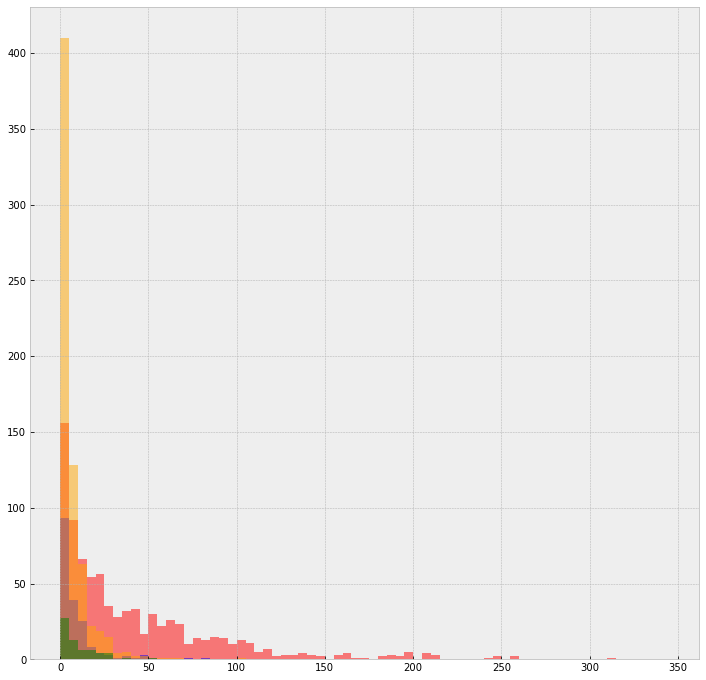

In [137]:
plt.figure(1, figsize=(12, 12))
binrange = np.arange(0, 350, 5)
plt.hist(areas[True_Positive1==1], color='r', alpha=0.5, bins=binrange)
plt.hist(areas[False_Positive1==1], color='b', alpha=0.5, bins=binrange)
plt.hist(areas[True_Negative1==1], color='orange', alpha=0.5, bins=binrange)
plt.hist(areas[False_Negative1==1], color='green', alpha=0.5, bins=binrange)

In [138]:
pred_whole_dataset_old = forest1.predict(ARC_X1)


In [139]:
True_Positive = np.zeros((len(arcs1)))
False_Positive = np.zeros(len(arcs1))
True_Negative = np.zeros(len(arcs1))
False_Negative = np.zeros(len(arcs1))
for i in range(len(arcs1)):

    if (arcs1[i] == 1 and pred_whole_dataset_old[i]==1):
        True_Positive[i] = 1.0
    if (arcs1[i] == 1 and pred_whole_dataset_old[i]==0):
        False_Negative[i] = 1.0
    if (arcs1[i] == 0 and pred_whole_dataset_old[i]==0):
        True_Negative[i] = 1.0
    if (arcs1[i] == 0 and pred_whole_dataset_old[i]==1):
        False_Positive[i] = 1.0


In [140]:
POD1 = np.shape(True_Positive[True_Positive==1])[0]/np.shape(arcs1[arcs1==1])[0]
print(POD1)
FAR1 = np.shape(False_Positive[False_Positive==1])[0]/np.shape(pred_whole_dataset_old[pred_whole_dataset_old==1])[0]
print(FAR1)

0.7562674094707521
0.08892617449664429


In [141]:
print(True_Positive.shape)
print(arcs1.shape)
print(arcs.shape)

(4724,)
(4724,)
(1752,)


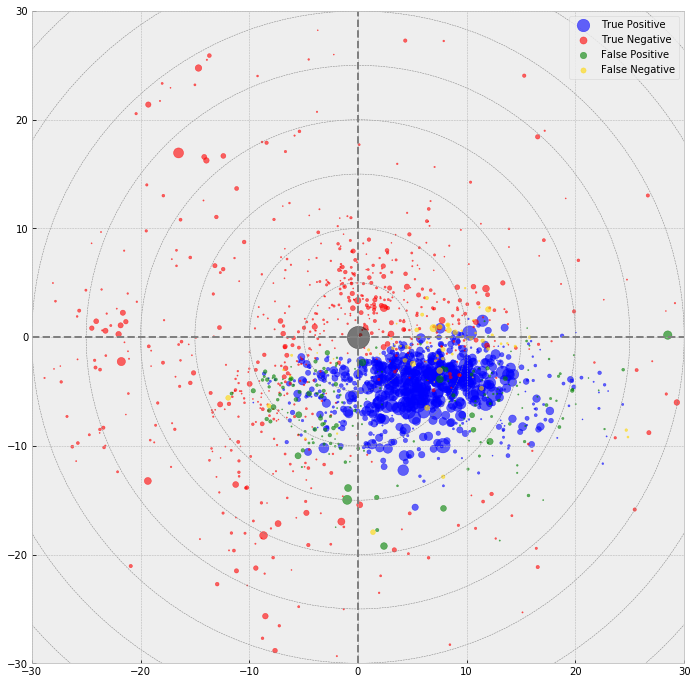

In [171]:
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=30.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=5)
h.ax.scatter(xc[np.where(True_Positive1==1.0)].magnitude, yc[np.where(True_Positive1==1.0)].magnitude, s=areas[np.where(True_Positive1==1.0)], color='blue', alpha=0.6, marker='o', label='True Positive')
h.ax.scatter(xc[np.where(True_Negative1==1.0)].magnitude, yc[np.where(True_Negative1==1.0)].magnitude, s=areas[np.where(True_Negative1==1.0)], color='red', alpha=0.6, marker='o', label='True Negative')
h.ax.scatter(xc[np.where(False_Positive1==1.0)].magnitude, yc[np.where(False_Positive1==1.0)].magnitude, s=areas[np.where(False_Positive1==1.0)], color='green', alpha=0.6, marker='o', label='False Positive')
h.ax.scatter(xc[np.where(False_Negative1==1.0)].magnitude, yc[np.where(False_Negative1==1.0)].magnitude, s=areas[np.where(False_Negative1==1.0)], color='gold', alpha=0.6, marker='o', label='False Negative')
h.ax.scatter([0], [0], s=500, color='k', alpha=0.5, marker='o')
plt.legend()
#plt.savefig('NewArcConfusionHodo.png')
plt.savefig('hodograph_plot.png')

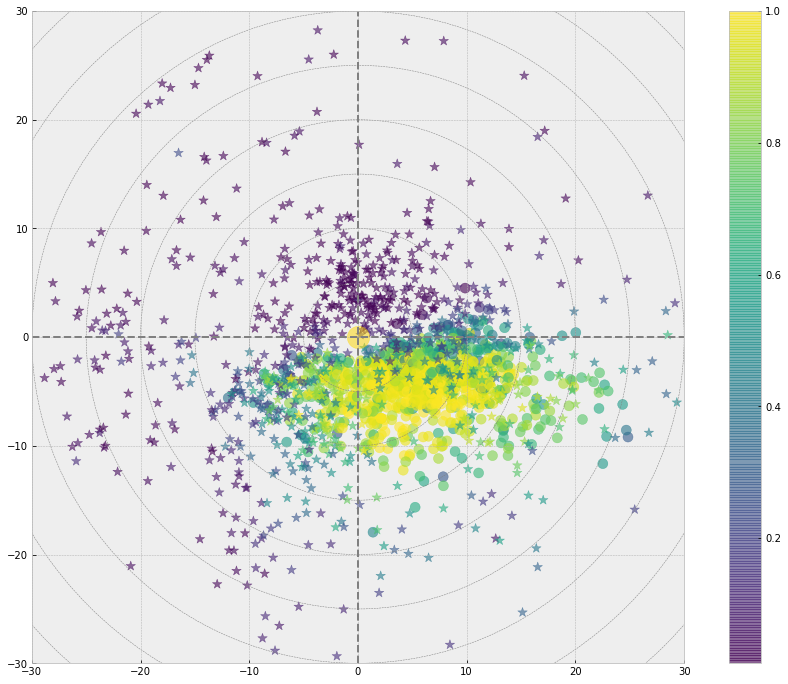

In [143]:
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=30.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=5)
sc_arc = h.ax.scatter(xc[np.where(arcs==1.0)].magnitude, yc[np.where(arcs==1.0)].magnitude, s=100, c=prob_whole_dataset_new[:,1][np.where(arcs==1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='o', norm=None)
h.ax.scatter(xc[np.where(arcs<1.0)].magnitude, yc[np.where(arcs<1.0)].magnitude, s=100, c=prob_whole_dataset_new[:,1][np.where(arcs<1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='*', norm=None)
h.ax.scatter([0], [0], s=500, color='gold', alpha=0.5, marker='o')
plt.colorbar(sc_arc)
plt.savefig('NewArcHodograph.png')

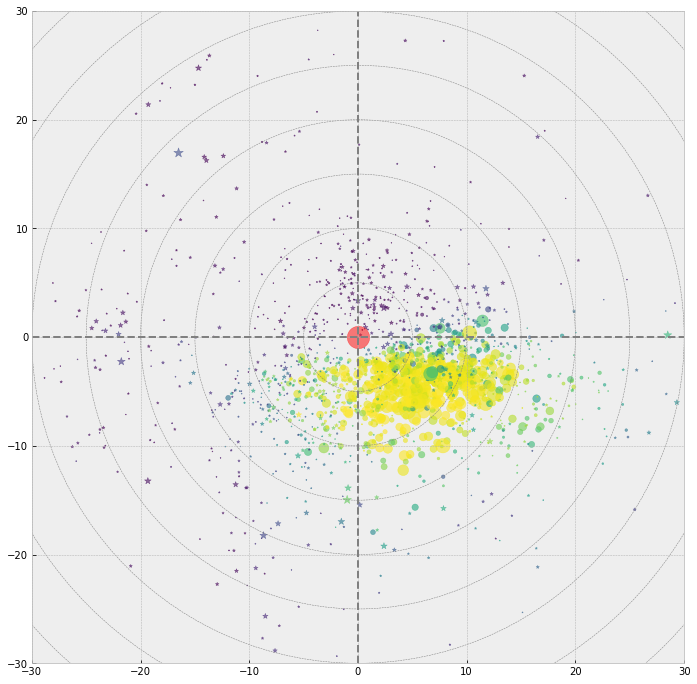

In [144]:
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=30.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=5)
h.ax.scatter(xc[np.where(arcs==1.0)].magnitude, yc[np.where(arcs==1.0)].magnitude, s=areas[np.where(arcs==1.0)], c=prob_whole_dataset_new[:,1][np.where(arcs==1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='o', norm=None)
h.ax.scatter(xc[np.where(arcs<1.0)].magnitude, yc[np.where(arcs<1.0)].magnitude, s=areas[np.where(arcs<1.0)], c=prob_whole_dataset_new[:,1][np.where(arcs<1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='*', norm=None)
h.ax.scatter([0], [0], s=500, color='r', alpha=0.5, marker='o')

In [145]:
print(np.min(ARC_Y1))
print(np.max(ARC_Y1))

0.0
1.0


In [146]:
#Try the gridCV forest optimization technique
#Only run this once since it takes forever
#forest_new_CV = RandomForestClassifier(random_state=123)

In [147]:
# model_params = {
#     'n_estimators': [50, 100, 250, 500, 1000],
#     'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
#     'min_samples_split': [2, 4, 6]
# }

In [148]:
#clf3 = GridSearchCV(forest_new_CV, model_params, cv=10)

In [149]:
#model3 = clf3.fit(ARC_X1, ARC_Y1)

In [150]:
# print winning set of hyperparameters
# from pprint import pprint
# pprint(model3.best_estimator_.get_params())

In [151]:
# print(model3.best_estimator_)
# best_classifier_cv = model3.best_estimator_

In [152]:
# accuracies_cv1 = []

# for train_index, test_index in kf1.split(ARC_X1, ARC_Y1):
#     #print(train_index.shape)
#     #print(test_index.shape)
#     trainX_ARC1 = ARC_X1[train_index]
#     testX_ARC1 = ARC_X1[test_index]
#     trainY_ARC1 = ARC_Y1[train_index]
#     testY_ARC1 = ARC_Y1[test_index]

#     print(trainX_ARC1.shape)
#     best_classifier_cv.fit(trainX_ARC1, trainY_ARC1)
#     #print(forest1.oob_score.real)
#     print('Accuracy: \n', best_classifier_cv.score(testX_ARC1, testY_ARC1))
#     accuracies_cv1.append(best_classifier_cv.score(testX_ARC1, testY_ARC1))

In [153]:
#print(np.mean(accuracies_cv1))

In [154]:
#print('Accuracy: \n', best_classifier_cv.score(ARC_X, ARC_Y))

In [155]:
import pickle
#Save off the best-performing forest as a pickle file!
filename = 'NewDataRandomForest.pkl'
pickle.dump(forest_all, open(filename, 'wb'))

In [216]:
stampfile = pickle.load(open('SPORK/ZDR_stamps/Stamps2013417KFDR.pkl', 'rb'))

In [217]:
REF_p = stampfile[0]
lon_p = stampfile[1]
lat_p = stampfile[2]
post_lons = stampfile[3]
post_lats = stampfile[4]
ZDR_stamps = stampfile[5]
KDP_stamps = stampfile[6]
CC_stamps = stampfile[7]
#zdr_mask_stamps = stampfile[8]

In [218]:
cenlon = post_lons[5]
cenlat = post_lats[5]

In [219]:
REF_avgarr = np.zeros((REF_p[0].shape[0], REF_p[0].shape[1], len(REF_p)))
ZDR_avgarr = np.zeros((ZDR_stamps[0].shape[0], ZDR_stamps[0].shape[1], len(ZDR_stamps)))

print(REF_avgarr.shape)
for i in range(len(REF_p)):
    REF_avgarr[:,:,i] = REF_p[i]
    ZDR_avgarr[:,:,i] = ZDR_stamps[i]    

(100, 100, 27)


In [220]:
REF_avg = np.mean(REF_avgarr, axis=2)
ZDR_avg = np.mean(ZDR_avgarr, axis=2)

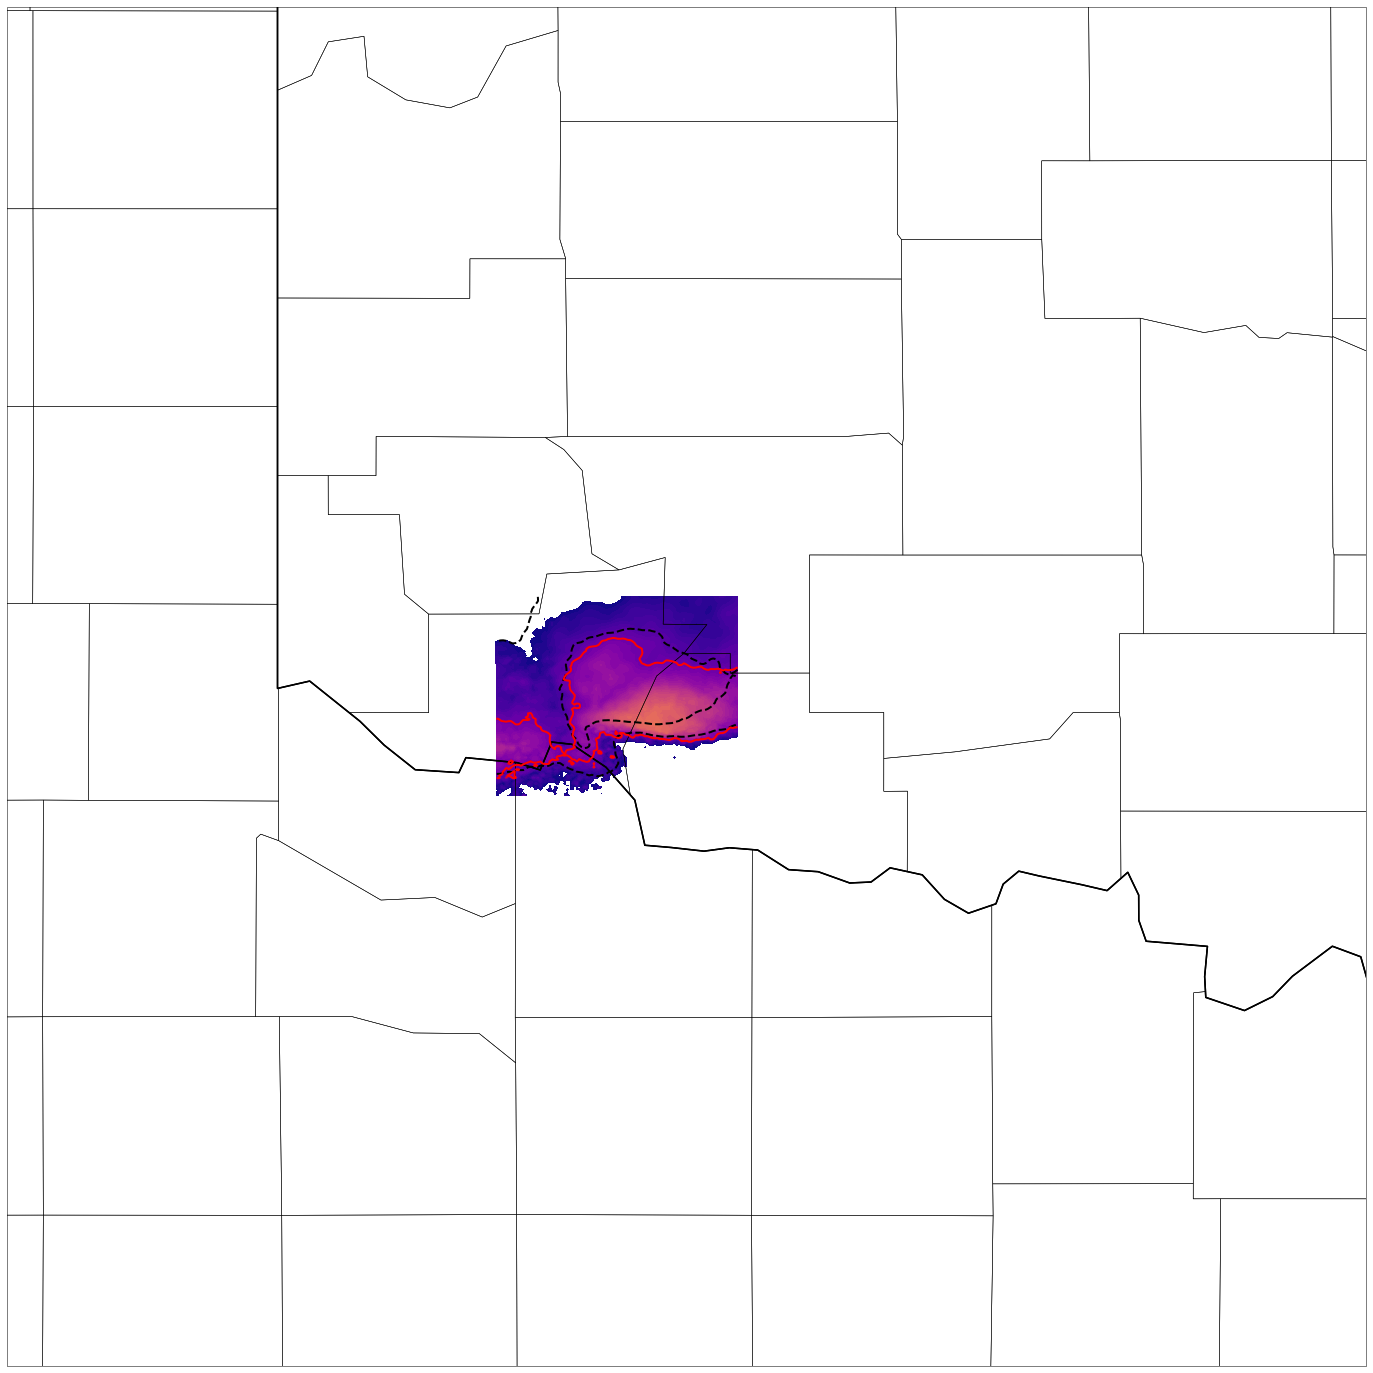

In [221]:
#Let's set up the map projection!
#print('Set up our projection')
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
# Limit the extent of the map area, must convert to proper coords.
LL = (cenlon-1.5,cenlat-1.5,ccrs.PlateCarree())
UR = (cenlon+1.5,cenlat+1.5,ccrs.PlateCarree())
#print(LL)

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='50m',
        facecolor='none')
#Make sure these shapefiles are in the same directory as the script
fname = 'cb_2016_us_county_20m/cb_2016_us_county_20m.shp'
fname2 = 'cb_2016_us_state_20m/cb_2016_us_state_20m.shp'
counties = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'black')
states = ShapelyFeature(Reader(fname2).geometries(),ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'black')
#Create a figure and plot up the initial data and contours for the algorithm
fig=plt.figure(1,figsize=(30.,25.))
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
ax.add_feature(counties, edgecolor = 'black', linewidth = 0.5)
ax.add_feature(states, edgecolor = 'black', linewidth = 1.5)
ax.set_extent([LL[0],UR[0],LL[1],UR[1]])
REFlevels = np.arange(0,73,2)
ZDRlevels = np.arange(1,6,0.1)
KDPlevels = np.arange(0,6,0.1)
#plt.contour(rlons_2d, rlats_2d, REF, [35])
#plt.scatter(postlon, postlat, s=200, zorder=10)
#plt.scatter(rlons_2d[xminlon, yminlon], rlats_2d[xminlat, yminlat], s=200)
#plt.contourf(lonpost, latpost, REFpost, REFlevels, cmap = 'HomeyerRainbow')
# for i in range(len(REF_p)):
# #    try:
#plt.contourf(lon_p[0], lat_p[0], REF_avg, REFlevels, cmap ='jet')
plt.contour(lon_p[0], lat_p[0], REF_avg, [20,40], colors='k', linestyles='--')

plt.contourf(lon_p[0], lat_p[0], ZDR_avg, ZDRlevels, cmap =plt.cm.plasma)
plt.contour(lon_p[0], lat_p[0], ZDR_avg, [2], colors='r')

    #plt.contourf(lon_p[i], lat_p[i], ZDR_stamps[i], ZDRlevels, cmap = plt.cm.plasma)
#     try:
#         #plt.contourf(lon_p[i], lat_p[i], ZDR_p_mask[i], ZDRlevels, cmap = plt.cm.plasma)
#     except:
#         continue
    #plt.contourf(lon_p[i], lat_p[i], KDP_stamps[i], KDPlevels, cmap = plt.cm.gist_ncar)
    
#    except:
#        print("uh oh, problem with", i)
plt.show()        

In [222]:
#Create some dummy distances in km for the mean reflectivity array
x_d = np.arange(-25, 25, 0.5)
y_d = np.arange(-25, 25, 0.5)

x_d1, y_d1 = np.meshgrid(x_d, y_d)
print(x_d.shape)
print(x_d)

(100,)
[-25.  -24.5 -24.  -23.5 -23.  -22.5 -22.  -21.5 -21.  -20.5 -20.  -19.5
 -19.  -18.5 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5 -14.  -13.5
 -13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5  -8.   -7.5
  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5
  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5
   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5
  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5
  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5
  23.   23.5  24.   24.5]


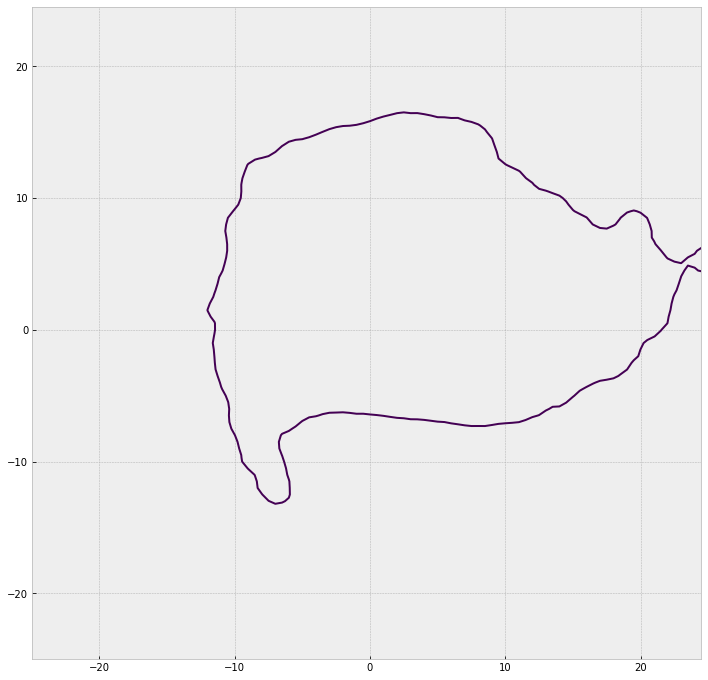

In [225]:
fig=plt.figure(1,figsize=(12.,12.))
plt.contour(x_d1, y_d1, REF_avg, [40])

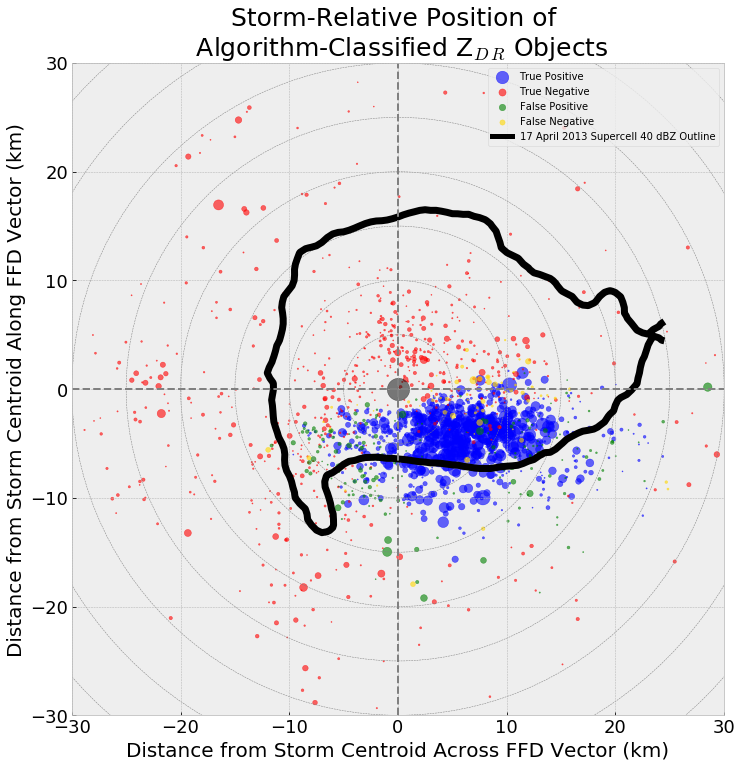

In [244]:
import matplotlib.lines as mlines
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=30.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=5)
tp=h.ax.scatter(xc[np.where(True_Positive1==1.0)].magnitude, yc[np.where(True_Positive1==1.0)].magnitude, s=areas[np.where(True_Positive1==1.0)], color='blue', alpha=0.6, marker='o', label='True Positive')
tn=h.ax.scatter(xc[np.where(True_Negative1==1.0)].magnitude, yc[np.where(True_Negative1==1.0)].magnitude, s=areas[np.where(True_Negative1==1.0)], color='red', alpha=0.6, marker='o', label='True Negative')
fp=h.ax.scatter(xc[np.where(False_Positive1==1.0)].magnitude, yc[np.where(False_Positive1==1.0)].magnitude, s=areas[np.where(False_Positive1==1.0)], color='green', alpha=0.6, marker='o', label='False Positive')
fn=h.ax.scatter(xc[np.where(False_Negative1==1.0)].magnitude, yc[np.where(False_Negative1==1.0)].magnitude, s=areas[np.where(False_Negative1==1.0)], color='gold', alpha=0.6, marker='o', label='False Negative')
h.ax.scatter([0], [0], s=500, color='k', alpha=0.5, marker='o')
h.ax.contour(x_d1, y_d1, REF_avg, [40], colors='k', linewidths=7)
storm_outline = mlines.Line2D([], [], color='k', linewidth = 5, linestyle = 'solid', label='17 April 2013 Supercell 40 dBZ Outline')
plt.title('Storm-Relative Position of \n Algorithm-Classified Z$_D$$_R$ Objects', size=25)
plt.ylabel('Distance from Storm Centroid Along FFD Vector (km)', size=20)
plt.xlabel('Distance from Storm Centroid Across FFD Vector (km)', size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(handles=[tp,tn,fp,fn,storm_outline])
#plt.savefig('NewArcConfusionHodo.png')
plt.savefig('hodograph_figure1.png')